# Data Visualizations with Python

### Base Imports

In [1]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

### Set Options

In [2]:
# display up to 999 rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%%javascript
// increase output display height before scroll
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [30]:
# visualization options
%matplotlib inline
sns.set_style("whitegrid")

### Load & Explore Data

In [119]:
# Data source: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

df = pd.read_csv('NYC_Leading_CoD.csv', low_memory=False)
df2 = pd.read_csv('Water_Consumption.csv', low_memory=False) # good time series
df3 = pd.read_csv('Payroll_Data.csv', low_memory=False)


# A bit of data cleaning
df.rename(columns={"Leading Cause":"Leading_Cause", "Race Ethnicity": "Race_Ethnicity", \
                   "Death Rate": "Death_Rate", "Age Adjusted Death Rate":"Age_Adjusted_Death_Rate"}, inplace=True)

df.replace('.', np.nan, inplace=True)

df.Year = df.Year.astype('category')
df.Leading_Cause = df.Leading_Cause.astype('category')
df.Sex = df.Sex.astype('category')
df.Race_Ethnicity = df.Race_Ethnicity.astype('category')

df.Deaths = pd.to_numeric(df.Deaths, errors='ignore')
df.Death_Rate = pd.to_numeric(df.Death_Rate, errors='ignore')
df.Age_Adjusted_Death_Rate = pd.to_numeric(df.Age_Adjusted_Death_Rate, errors='ignore')

df.Year.cat.categories
df.Leading_Cause.cat.categories
df.Sex.cat.categories
df.Race_Ethnicity.cat.categories

df.dtypes
df.shape
df.head()
df.sample(20)
df.tail()
df.describe()

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64')

Index(['Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'All Other Causes', 'Alzheimer's Disease (G30)',
       'Aortic Aneurysm and Dissection (I71)',
       'Assault (Homicide: Y87.1, X85-Y09)', 'Atherosclerosis (I70)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Diabetes Mellitus (E10-E14)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Malignant Neoplasms (Cancer:

Index(['F', 'M'], dtype='object')

Index(['Asian and Pacific Islander', 'Black Non-Hispanic', 'Hispanic',
       'Not Stated/Unknown', 'Other Race/ Ethnicity', 'White Non-Hispanic'],
      dtype='object')

Year                       category
Leading_Cause              category
Sex                        category
Race_Ethnicity             category
Deaths                      float64
Death_Rate                  float64
Age_Adjusted_Death_Rate     float64
dtype: object

(1094, 7)

,Year,Leading_Cause,Sex,Race_Ethnicity,Deaths,Death_Rate,Age_Adjusted_Death_Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5.0,NaN,NaN
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,NaN,NaN,NaN
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1,5.4


,Year,Leading_Cause,Sex,Race_Ethnicity,Deaths,Death_Rate,Age_Adjusted_Death_Rate
466,2007,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Other Race/ Ethnicity,NaN,NaN,NaN
1047,2008,Influenza (Flu) and Pneumonia (J09-J18),F,Black Non-Hispanic,318.0,30.4,28.6
546,2014,All Other Causes,M,Hispanic,1195.0,100.1,143.3
697,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1958.0,226.8,264.7
915,2012,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander,461.0,78.9,83.8
184,2010,All Other Causes,M,White Non-Hispanic,2034.0,151.6,130.9
471,2013,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Asian and Pacific Islander,41.0,7.4,7.2
1026,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Asian and Pacific Islander,29.0,5.2,5.4
581,2013,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,93.0,8.9,7.6
16,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,4220.0,316.4,260.2


,Year,Leading_Cause,Sex,Race_Ethnicity,Deaths,Death_Rate,Age_Adjusted_Death_Rate
1089,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,188.0,18.0,16.4
1090,2009,Cerebrovascular Disease (Stroke: I60-I69),F,Not Stated/Unknown,5.0,NaN,NaN
1091,2014,Diabetes Mellitus (E10-E14),M,Black Non-Hispanic,318.0,36.8,42.2
1092,2008,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,71.0,6.8,6.3
1093,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,62.0,NaN,NaN


,Deaths,Death_Rate,Age_Adjusted_Death_Rate
count,956.000000,708.000000,708.000000
mean,444.558577,53.438842,53.462288
std,880.107843,76.524700,69.100734
min,5.000000,2.400000,2.500000
25%,36.000000,11.600000,12.150000
50%,148.500000,18.350000,20.350000
75%,307.250000,64.625000,77.550000
max,7050.000000,491.400000,350.700000


# Missing Data

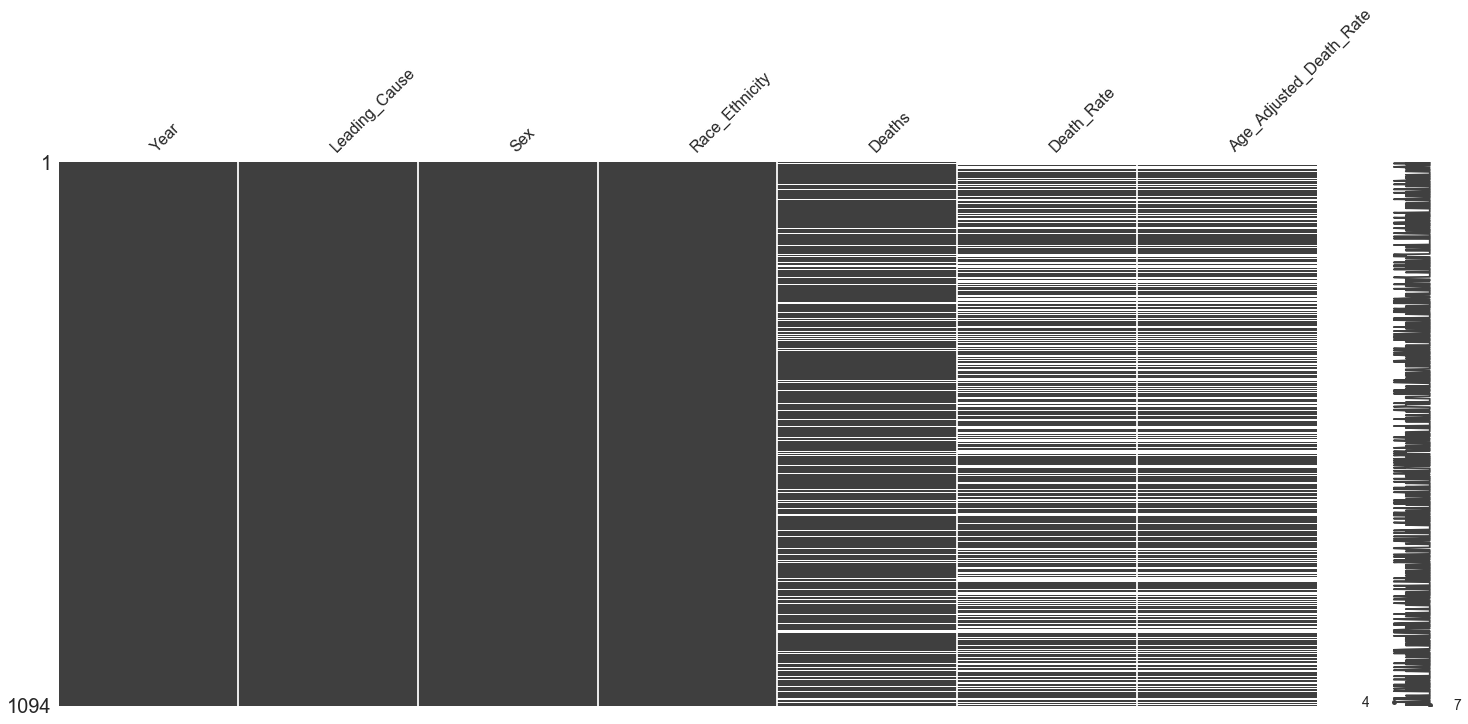

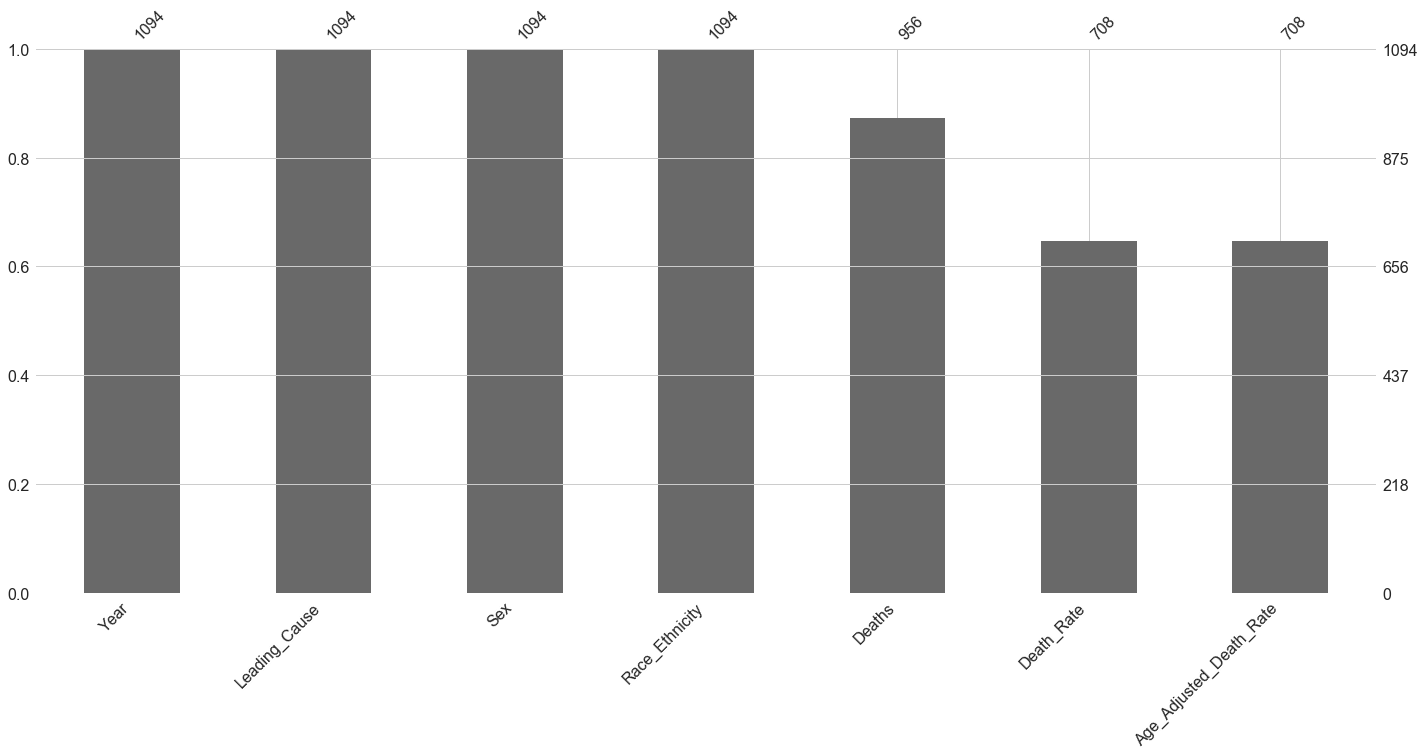

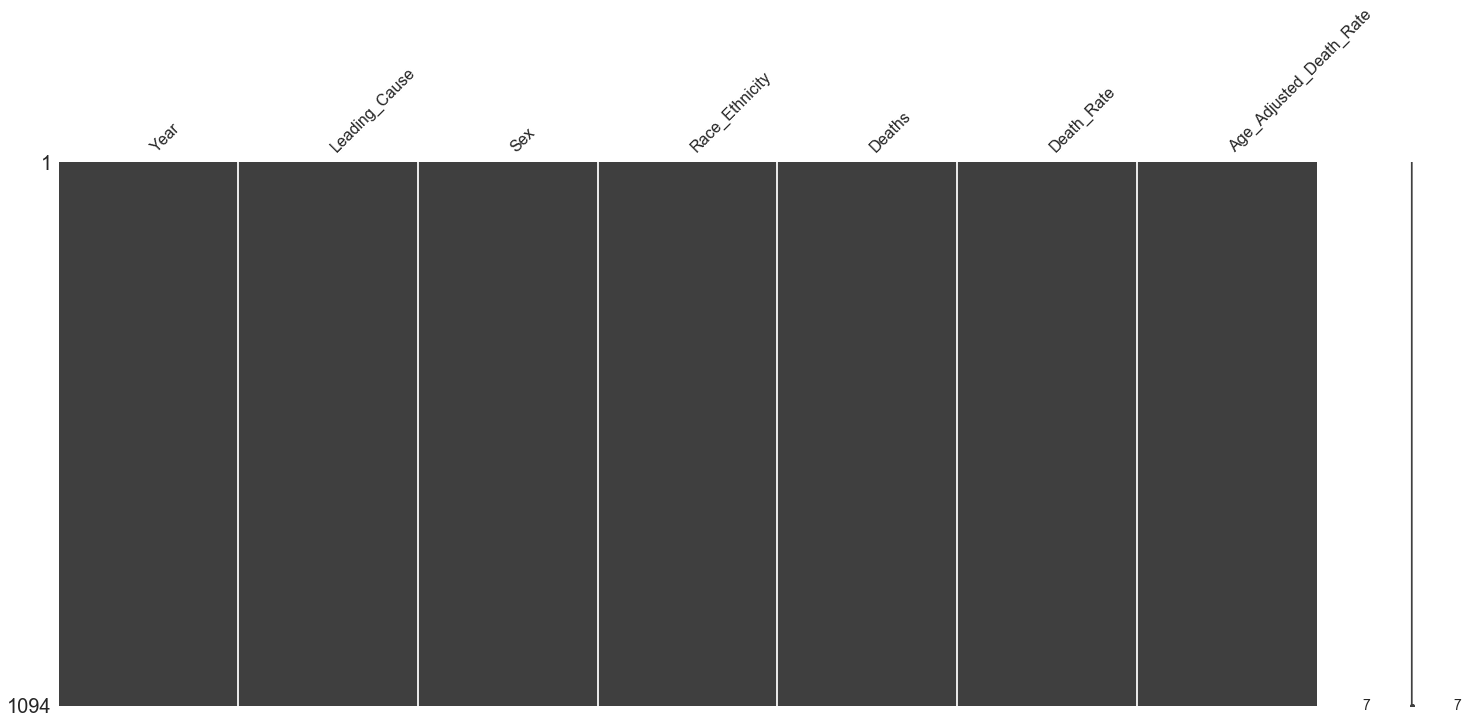

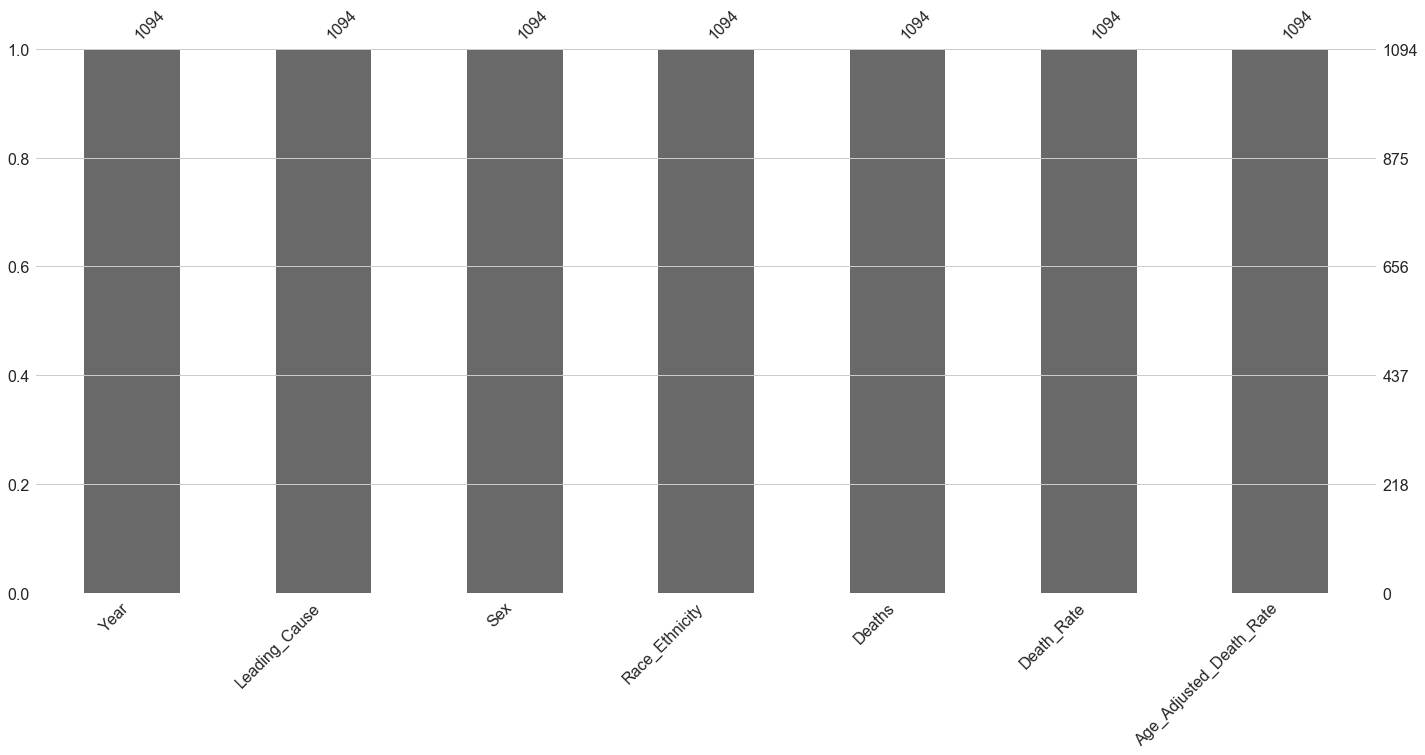

In [120]:
msno.matrix(df)
msno.bar(df)

# fill NaNs as 0
df.Deaths = df.Deaths.fillna(0)
df.Death_Rate = df.Death_Rate.fillna(0)
df.Age_Adjusted_Death_Rate = df.Age_Adjusted_Death_Rate.fillna(0)

msno.matrix(df)
msno.bar(df)

# Quantitative Data

## Continuous Data

### Univariate

#### Histogram

#### Dot Plot

#### Box Plot

In [194]:
# Set figure size
plt.figure(figsize=(12,12))

# df.sample(100)
data = df.groupby(['Race_Ethnicity']).agg({'Deaths':sum}).reset_index()

# ax = sns.boxplot(x=df.Death_Rate)
ax = sns.boxplot(x="Race_Ethnicity", y="Deaths", data=data)

AttributeError: Cannot access callable attribute 'get' of 'DataFrameGroupBy' objects, try using the 'apply' method

### Bivariate

#### Scatter Plot

### Multivariate

#### Parallel Coordinate Plot

#### Scatterplot Matrix

## Discrete Data 

### Univariate

#### Bar Chart

### Bivariate

#### Scatter Plot

### Multivariate

#### Parallel Coordinate Plot

In [6]:
# from pandas.plotting import parallel_coordinates

# data = pd.read_csv('data/iris.data')

# plt.figure()

# parallel_coordinates(data, 'Name')

#### Mosaic Plot

# Categorical Data

## Nominal Data

#### Bar Chart

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

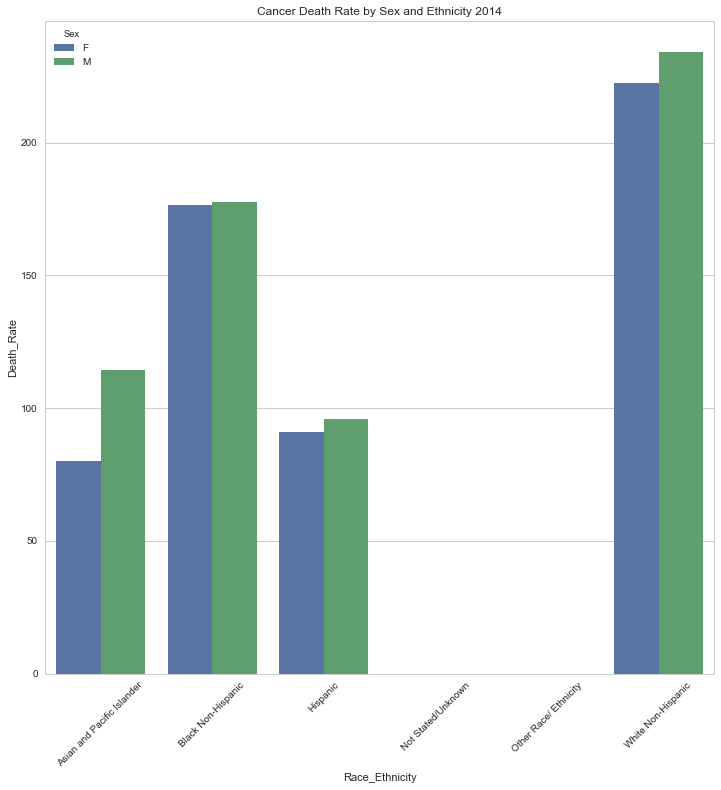

In [144]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Race_Ethnicity', y='Death_Rate',  hue='Sex', data=data)

# Set title and rotate axes
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")
plt.xticks(rotation=45) 

#### Horizontal Bar Chart

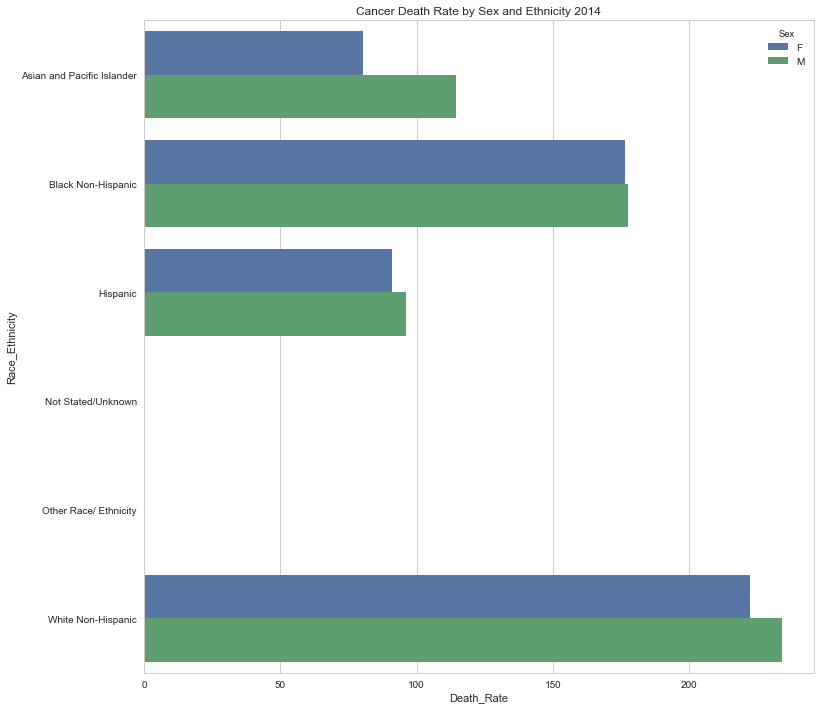

In [153]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Death_Rate', y='Race_Ethnicity',  hue='Sex', data=data)

# Set title
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")

#### Faceted Bar Charts

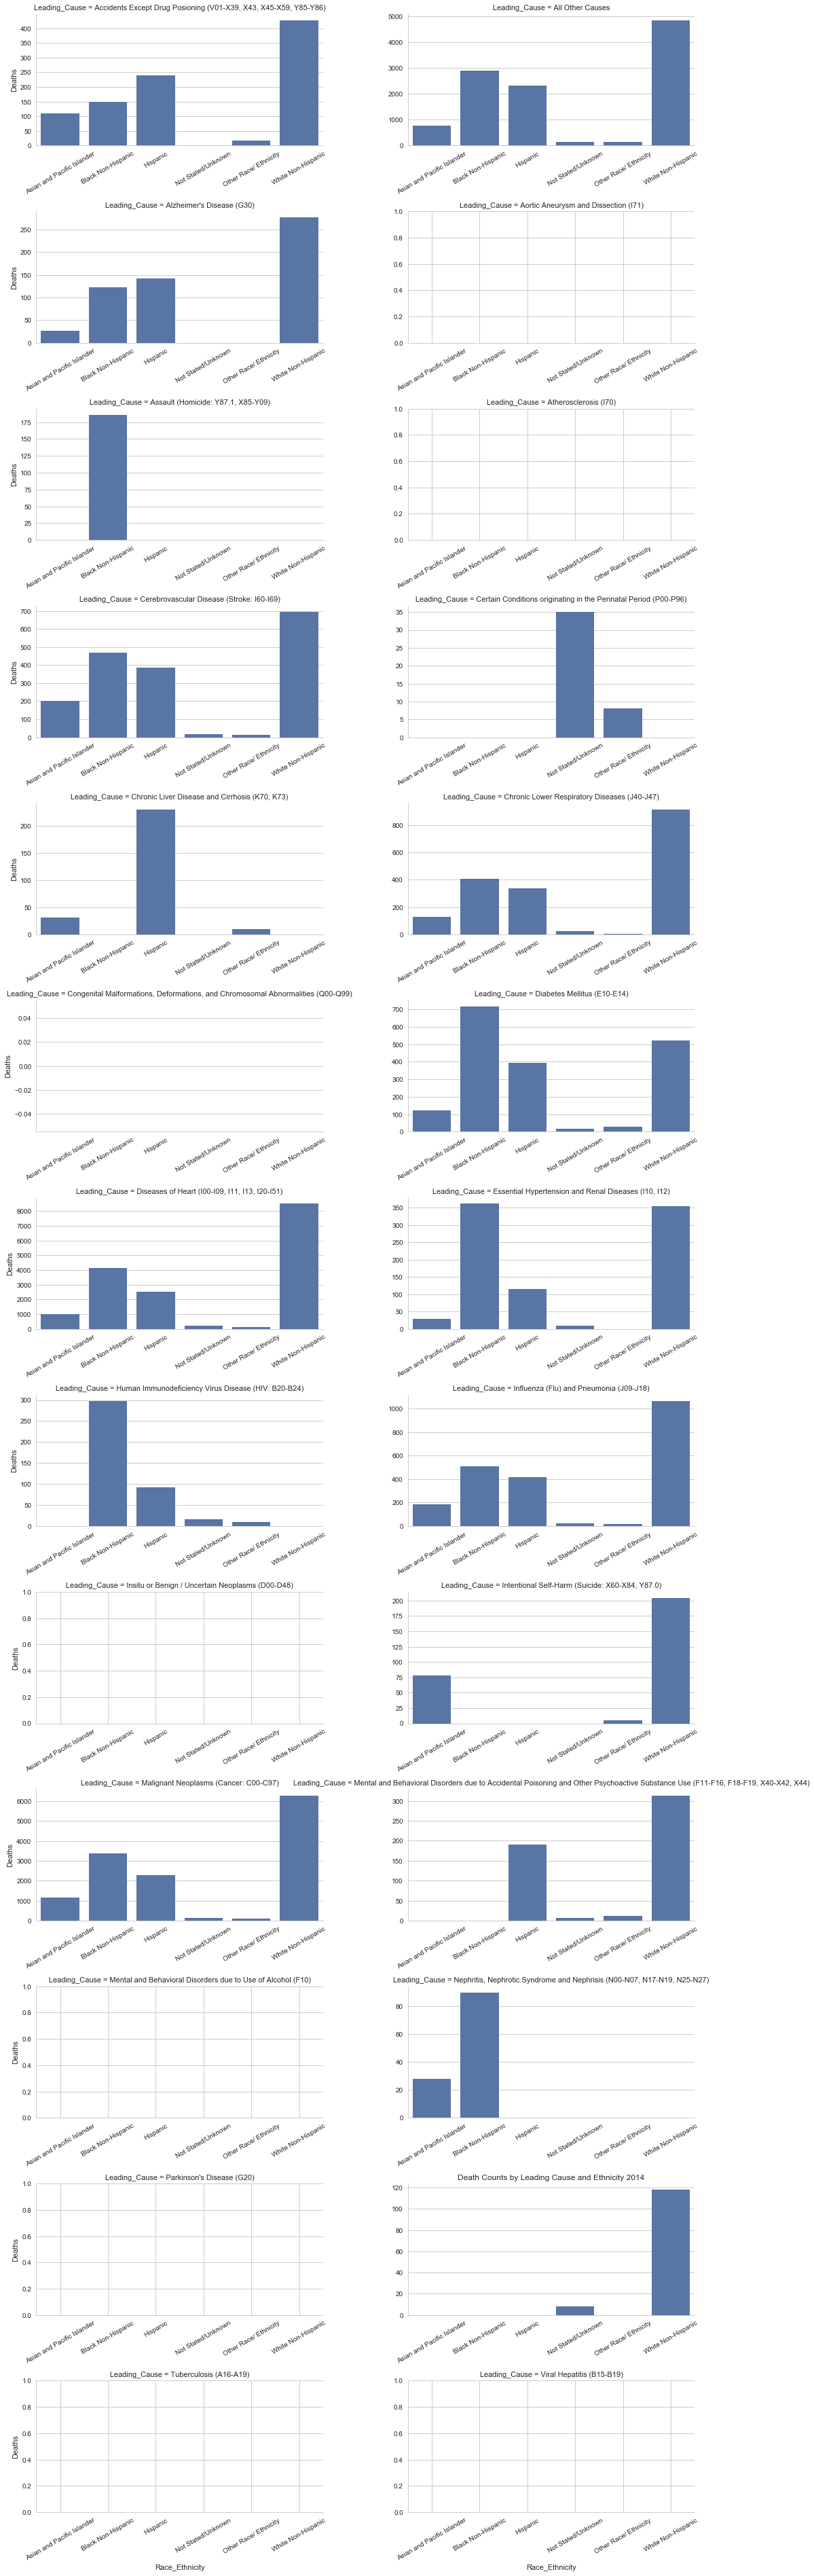

In [176]:
# # Plot the "Count" of the top 5 highest "Rank" for "Childs_First_Name" in year "2014" by "Ethnicity"
data = df[df.Year == 2014]\
    .groupby(['Leading_Cause', 'Race_Ethnicity'])\
    .agg({'Deaths':sum})\
    .reset_index()

# # Names for x ticks
names = data.Race_Ethnicity.unique()

# # Create facet plots as bar charts
g = sns.FacetGrid(data, col='Leading_Cause', col_wrap=2, size=4, aspect=2, sharey=False)
g.map(sns.barplot, 'Race_Ethnicity', 'Deaths', order=names)

# # Make x ticks available for each subplot
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True, rotation=30)

# # Increase space between subplots
plt.subplots_adjust(hspace=0.5)

# Set title and rotate axes
plt.title("Death Counts by Leading Cause and Ethnicity 2014")

## Oridinal Data

#### Bar Chart

In [9]:



data = df[df.Gender == 'FEMALE']
data.head()
# data = df[df.Rank < 20]

# df2.plot.bar();

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank
0,2011,FEMALE,HISPANIC,Geraldine,13,75
1,2011,FEMALE,HISPANIC,Gia,21,67
2,2011,FEMALE,HISPANIC,Gianna,49,42
3,2011,FEMALE,HISPANIC,Giselle,38,51
4,2011,FEMALE,HISPANIC,Grace,36,53


#### Stacked Bar Charts

In [11]:
# df2.plot.bar(stacked=True);

## Heat Map

In [ ]:
# sns.heatmap(data,linewidth=0,yticklabels=yticks,xticklabels=xticks)

## Time Series

## Violin Plot

In [109]:
# sns.violinplot(data=df, inner="points", ax=ax)    